In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data=pd.read_csv("sales_train.csv")

In [3]:
print(train_data)

               date  date_block_num  shop_id  item_id  item_price  \
0        02.01.2013               0       59    22154      999.00   
1        03.01.2013               0       25     2552      899.00   
2        05.01.2013               0       25     2552      899.00   
3        06.01.2013               0       25     2554     1709.05   
4        15.01.2013               0       25     2555     1099.00   
...             ...             ...      ...      ...         ...   
2935844  10.10.2015              33       25     7409      299.00   
2935845  09.10.2015              33       25     7460      299.00   
2935846  14.10.2015              33       25     7459      349.00   
2935847  22.10.2015              33       25     7440      299.00   
2935848  03.10.2015              33       25     7460      299.00   

         item_cnt_day  
0                 1.0  
1                 1.0  
2                -1.0  
3                 1.0  
4                 1.0  
...               ...  
293

In [4]:
train_data.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

In [5]:
x=train_data["shop_id"].unique()

In [6]:
x.sort()
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59], dtype=int64)

In [7]:
import matplotlib.pyplot as plt


In [8]:
train_data.max()

date              31.12.2014
date_block_num            33
shop_id                   59
item_id                22169
item_price            307980
item_cnt_day            2169
dtype: object

In [9]:
import seaborn as sns

In [10]:
sns.set({'figure.figsize':(12,6)})


In [11]:
train_data.set_index(train_data.columns[0])

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
02.01.2013,0,59,22154,999.00,1.0
03.01.2013,0,25,2552,899.00,1.0
05.01.2013,0,25,2552,899.00,-1.0
06.01.2013,0,25,2554,1709.05,1.0
15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...
10.10.2015,33,25,7409,299.00,1.0
09.10.2015,33,25,7460,299.00,1.0
14.10.2015,33,25,7459,349.00,1.0


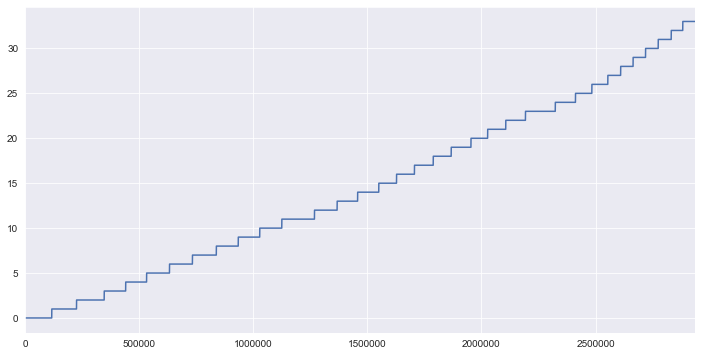

In [12]:
train_data["date_block_num"].plot()

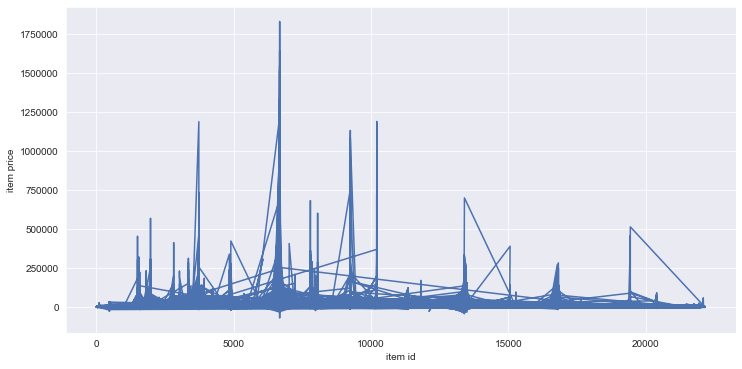

In [13]:
plt.xlabel("item id")
plt.ylabel("item price")
plt.plot(train_data.item_id,(train_data.item_cnt_day*train_data.item_price))
plt.show()

In [14]:
grouped=pd.DataFrame(train_data.groupby(['date_block_num'])['item_cnt_day'].sum().reset_index())
grouped

,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0
5,5,125381.0
6,6,116966.0
7,7,125291.0
8,8,133332.0
9,9,127541.0


In [15]:
#pd.options.display.max_rows=999
#grouped.head(100)

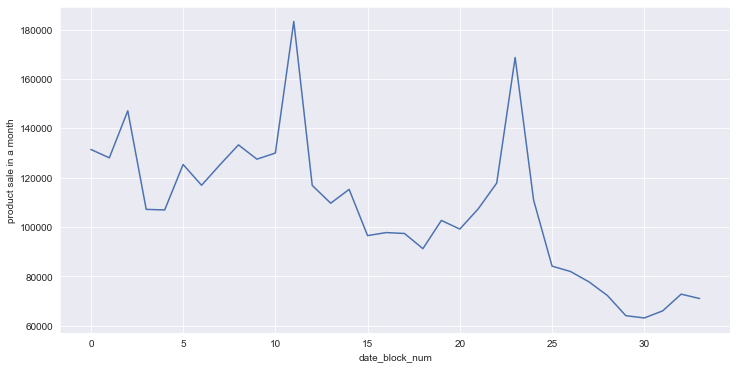

In [16]:
plt.xlabel("date_block_num")
plt.ylabel("product sale in a month")
plt.plot(grouped.date_block_num,grouped.item_cnt_day)
plt.show()

In [17]:
grouped2=pd.DataFrame(train_data.groupby(['shop_id'])['item_cnt_day'].sum().reset_index())

In [18]:
grouped2

,shop_id,item_cnt_day
0,0,11705.0
1,1,6311.0
2,2,30620.0
3,3,28355.0
4,4,43942.0
5,5,42762.0
6,6,100489.0
7,7,67058.0
8,8,3595.0
9,9,15866.0


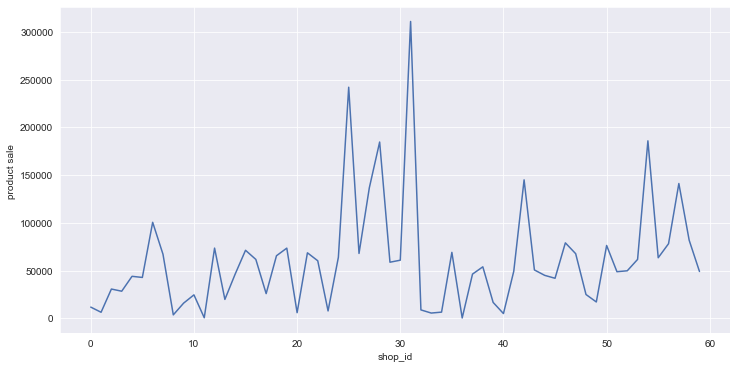

In [19]:
plt.xlabel("shop_id")
plt.ylabel("product sale ")
plt.plot(grouped2.shop_id,grouped2.item_cnt_day)
plt.show()

In [20]:
x=pd.DataFrame((train_data["shop_id"],train_data["item_cnt_day"]*train_data["item_price"]),index=['shop_id','revenue'])

In [21]:
x

,0,1,2,3,4,5,6,7,8,9,...,2935839,2935840,2935841,2935842,2935843,2935844,2935845,2935846,2935847,2935848
shop_id,59.0,25.0,25.0,25.00,25.0,25.0,25.0,25.0,25.0,25.0,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
revenue,999.0,899.0,-899.0,1709.05,1099.0,349.0,549.0,239.0,299.0,897.0,...,399.0,299.0,349.0,749.0,299.0,299.0,299.0,349.0,299.0,299.0


In [22]:
y=x.transpose()


In [23]:
grouped3=pd.DataFrame(y.groupby(['shop_id'])['revenue'].sum().reset_index())

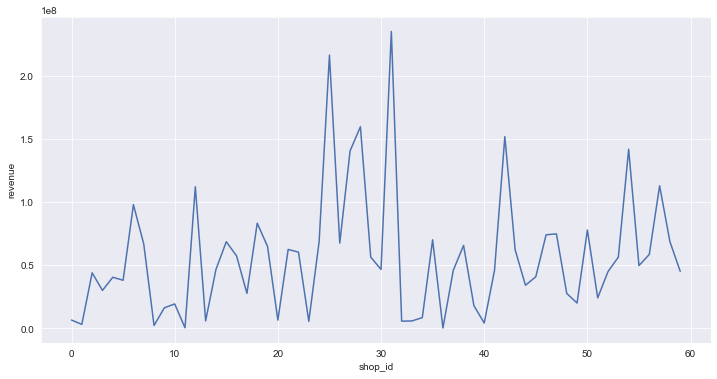

In [24]:
plt.xlabel("shop_id")
plt.ylabel("revenue")
plt.plot(grouped3.shop_id,grouped3.revenue)
plt.show()

In [25]:
a=pd.DataFrame((train_data["date_block_num"],train_data["item_cnt_day"]*train_data["item_price"]),index=['date_block_num','revenue'])

In [26]:
a

,0,1,2,3,4,5,6,7,8,9,...,2935839,2935840,2935841,2935842,2935843,2935844,2935845,2935846,2935847,2935848
date_block_num,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0
revenue,999.0,899.0,-899.0,1709.05,1099.0,349.0,549.0,239.0,299.0,897.0,...,399.0,299.0,349.0,749.0,299.0,299.0,299.0,349.0,299.0,299.0


In [27]:
b=a.transpose()
b


,date_block_num,revenue
0,0.0,999.00
1,0.0,899.00
2,0.0,-899.00
3,0.0,1709.05
4,0.0,1099.00
...,...,...
2935844,33.0,299.00
2935845,33.0,299.00
2935846,33.0,349.00
2935847,33.0,299.00


In [28]:
grouped4=pd.DataFrame(b.groupby(['date_block_num'])['revenue'].sum().reset_index())

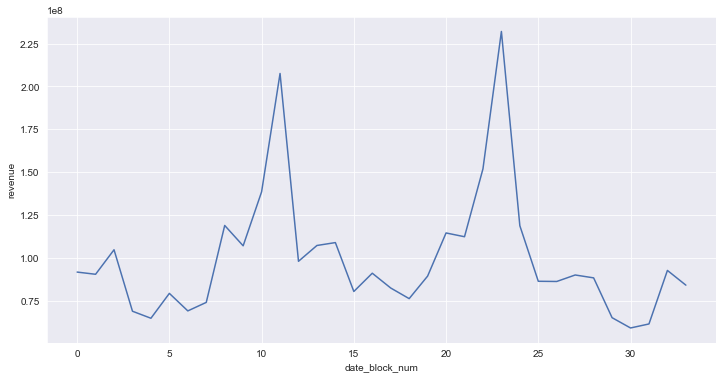

In [29]:
plt.xlabel("date_block_num")
plt.ylabel("revenue")
plt.plot(grouped4.date_block_num,grouped4.revenue)
plt.show()